In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # to draw visually
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score

In [8]:
df=pd.read_csv("HR-Employee-Attrition.csv")

In [9]:
df.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,1,1,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,49,No,279,8,1,1,2,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,1,4,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1392,3,4,1,5,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,27,No,591,2,1,1,7,1,Male,40,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df['Gender']=df['Gender'].map({'Female' : 1, 
                                 'Male' : 0})

In [11]:
df['Attrition']=df['Attrition'].map({
                                 'Yes' : 1, 
                                 'No' : 0})

In [12]:
x=df.drop(["Attrition"], axis=1)
y=df['Attrition']

In [13]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state= 42)

In [14]:
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
y_pred =model.predict(x_test)

In [16]:
acc=accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
cfm=confusion_matrix(y_test, y_pred)

In [17]:
print("accuracy", acc)
print("\nclassification report\n", cr)
print("confusion matrix\n", cfm)


accuracy 0.7959183673469388

classification report
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       255
           1       0.28      0.33      0.30        39

    accuracy                           0.80       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.81      0.80      0.80       294

confusion matrix
 [[221  34]
 [ 26  13]]


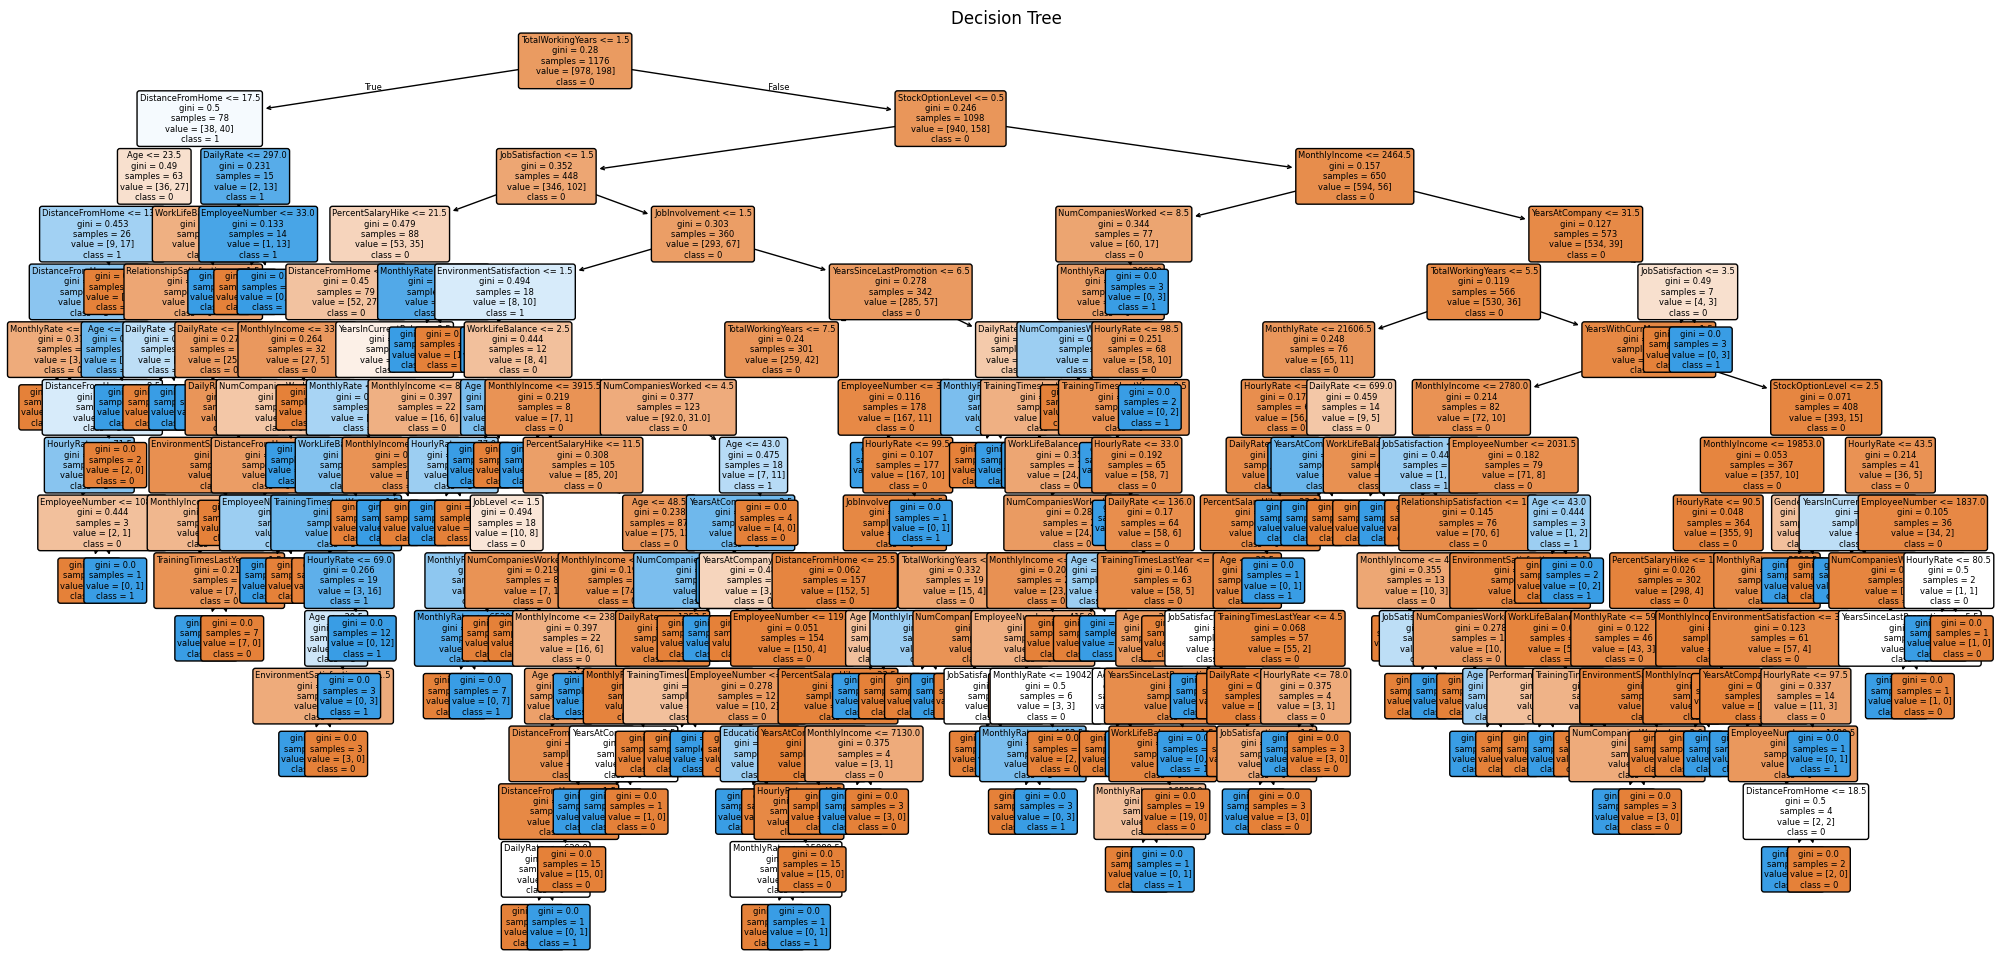

In [18]:
cols=x_train.columns.tolist()
names=[str(c) for c in sorted(y_train.unique())]
plt.figure(figsize=(25, 12))
plot_tree(model, feature_names=cols, class_names=names, filled=True, rounded=True, proportion=False, fontsize=6)
plt.title("Decision Tree")
plt.show()